In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [618]:
df_train=pd.read_csv("./Train.csv")

In [619]:
df_train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [620]:
df_test=pd.read_csv("./Test.csv")

In [621]:
print(df_train.shape,df_test.shape)

(23856, 18) (15903, 17)


In [622]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   INCIDENT_ID       23856 non-null  object 
 1   DATE              23856 non-null  object 
 2   X_1               23856 non-null  int64  
 3   X_2               23856 non-null  int64  
 4   X_3               23856 non-null  int64  
 5   X_4               23856 non-null  int64  
 6   X_5               23856 non-null  int64  
 7   X_6               23856 non-null  int64  
 8   X_7               23856 non-null  int64  
 9   X_8               23856 non-null  int64  
 10  X_9               23856 non-null  int64  
 11  X_10              23856 non-null  int64  
 12  X_11              23856 non-null  int64  
 13  X_12              23674 non-null  float64
 14  X_13              23856 non-null  int64  
 15  X_14              23856 non-null  int64  
 16  X_15              23856 non-null  int64 

In [623]:
Y_train=df_train['MULTIPLE_OFFENSE']

In [624]:
columns=['DATE','MULTIPLE_OFFENSE','INCIDENT_ID']
df_train.drop(columns=columns,axis=1,inplace=True)

In [625]:
incident_id=df_test['INCIDENT_ID'] # used for submission

In [626]:
df_test.drop(columns=['DATE','INCIDENT_ID'],axis=1,inplace=True)

In [627]:
df_test.head(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34


In [628]:
df_train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43


In [629]:
normalized_df=(df_train-df_train.mean())/df_train.std()

In [630]:
normalized_df_test=(df_test-df_test.mean())/df_test.std()

In [631]:
normalized_df_test.head(2)

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,-0.331481,0.346538,0.689141,0.912994,0.28091,-0.019072,-0.223789,-0.670665,0.066372,-0.286542,-0.353935,NaN,-0.479795,1.076964,-1.253581
1,-0.331481,1.265846,1.284086,-1.104095,0.28091,0.205591,-1.002090,2.048068,0.793816,-0.286542,1.171179,-1.109012,-2.662153,-0.994943,0.069444


In [632]:
normalized_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,-0.336018,0.735474,0.618599,-0.773174,-0.741487,-0.258103,0.289416,0.018952,0.789559,-0.21871,-0.354223,0.022210,0.245047,-1.008707,0.302290
1,0.358553,0.801090,0.816814,-1.452367,-1.250886,1.083651,3.123057,0.018952,0.789559,-0.21871,0.312205,0.022210,0.643638,1.601155,0.063821
2,-0.336018,-1.429847,-1.495693,-0.433578,1.296112,-1.152606,-1.256207,0.707115,-1.412075,-0.21871,-0.354223,0.022210,0.897286,0.469445,0.063821
3,-0.336018,0.538627,0.486456,-0.773174,-0.741487,0.189148,-0.998603,0.018952,0.789559,-0.21871,0.451940,0.022210,-0.479664,-1.008707,0.063821
4,-0.336018,0.538627,0.486456,-0.773174,-0.741487,0.412774,-0.483396,-0.669211,0.055681,-0.21871,-0.354223,-0.834156,0.969758,-1.008707,1.136931


In [633]:
normalized_df=normalized_df.fillna(normalized_df.mean())
normalized_df_test=normalized_df_test.fillna(normalized_df_test.mean())

In [634]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     23856 non-null  float64
 1   X_2     23856 non-null  float64
 2   X_3     23856 non-null  float64
 3   X_4     23856 non-null  float64
 4   X_5     23856 non-null  float64
 5   X_6     23856 non-null  float64
 6   X_7     23856 non-null  float64
 7   X_8     23856 non-null  float64
 8   X_9     23856 non-null  float64
 9   X_10    23856 non-null  float64
 10  X_11    23856 non-null  float64
 11  X_12    23856 non-null  float64
 12  X_13    23856 non-null  float64
 13  X_14    23856 non-null  float64
 14  X_15    23856 non-null  float64
dtypes: float64(15)
memory usage: 2.7 MB


In [635]:
normalized_df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15903 entries, 0 to 15902
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X_1     15903 non-null  float64
 1   X_2     15903 non-null  float64
 2   X_3     15903 non-null  float64
 3   X_4     15903 non-null  float64
 4   X_5     15903 non-null  float64
 5   X_6     15903 non-null  float64
 6   X_7     15903 non-null  float64
 7   X_8     15903 non-null  float64
 8   X_9     15903 non-null  float64
 9   X_10    15903 non-null  float64
 10  X_11    15903 non-null  float64
 11  X_12    15903 non-null  float64
 12  X_13    15903 non-null  float64
 13  X_14    15903 non-null  float64
 14  X_15    15903 non-null  float64
dtypes: float64(15)
memory usage: 1.8 MB


In [636]:
X_train=normalized_df.values
Y_train=Y_train
X_test=normalized_df_test.values

In [637]:
X_train.shape

(23856, 15)

### Neural Network

In [638]:
from keras.layers import Dense,Dropout
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [639]:
model=Sequential()
model.add(Dense(16,input_shape=(15,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(16,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_49"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 16)                256       
_________________________________________________________________
dropout_119 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_194 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_120 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_195 (Dense)            (None, 16)                272       
_________________________________________________________________
dropout_121 (Dropout)        (None, 16)                0         
_________________________________________________________________
dense_196 (Dense)            (None, 1)               

In [640]:
adam=Adam(lr=0.0003)

In [641]:
model.compile(optimizer=adam,loss='binary_crossentropy',metrics=['accuracy'])

In [642]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2)

In [643]:
hist=model.fit(
    X_train,
    Y_train,
    validation_data=(X_val,Y_val),
    epochs=10,
    batch_size=64,
    shuffle=True
)

Train on 19084 samples, validate on 4772 samples
Epoch 1/10
19084/19084 [==============================] - 1s 41us/step - loss: 0.5902 - accuracy: 0.6936 - val_loss: 0.3007 - val_accuracy: 0.9581
Epoch 2/10
19084/19084 [==============================] - 0s 25us/step - loss: 0.2566 - accuracy: 0.9502 - val_loss: 0.1580 - val_accuracy: 0.9581
Epoch 3/10
19084/19084 [==============================] - 0s 22us/step - loss: 0.2040 - accuracy: 0.9536 - val_loss: 0.1433 - val_accuracy: 0.9581
Epoch 4/10
19084/19084 [==============================] - 0s 23us/step - loss: 0.1867 - accuracy: 0.9539 - val_loss: 0.1345 - val_accuracy: 0.9581
Epoch 5/10
19084/19084 [==============================] - 0s 23us/step - loss: 0.1725 - accuracy: 0.9546 - val_loss: 0.1275 - val_accuracy: 0.9581
Epoch 6/10
19084/19084 [==============================] - 0s 24us/step - loss: 0.1614 - accuracy: 0.9546 - val_loss: 0.1216 - val_accuracy: 0.9581
Epoch 7/10
19084/19084 [==============================] - 0s 23us/ste

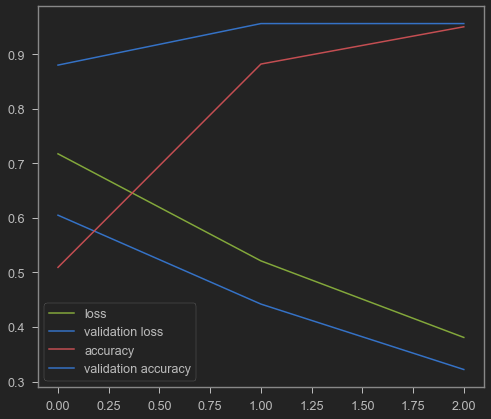

In [613]:
plt.plot(hist.history['loss'],'g',label='loss')
plt.plot(hist.history['val_loss'],'b',label='validation loss')

plt.plot(hist.history['accuracy'],'r',label='accuracy')
plt.plot(hist.history['val_accuracy'],'b',label='validation accuracy')
plt.legend()

In [614]:
prediction=model.predict_classes(X_test)
prediction=prediction.reshape((-1,))

In [615]:
temp=pd.DataFrame({"INCIDENT_ID":incident_id,'MULTIPLE_OFFENSE':prediction})
temp.to_csv("neural_network.csv",index=False)